<a href="https://colab.research.google.com/github/GoKarolis/ML_training_project/blob/main/kg_red_wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality 


---


by GoKarolis






***Inspiration:***

All wines are different, but physiochemical properties data and machine learning can help to determine a 'good' wine!


***Goal:***


*   Create a ML model which finds out the quality of wine


***Raw dataset can be found here:***

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Init

In [1]:
%matplotlib inline

In [2]:
!pip install shap
!pip install eli5

In [3]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score
import eli5
from eli5.sklearn import PermutationImportance
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since 

In [4]:
# Set Seaborn colors
sns.set_palette("Set2")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# wine_data == data
%time  data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/winequality-red.csv')

CPU times: user 15.1 ms, sys: 1.65 ms, total: 16.8 ms
Wall time: 19 ms


# **1. Exploratory data analysis**

# 1.1. Shape

In [7]:
data.shape

(1599, 12)

# 1.2. Descriptive statistics

In [8]:
data.isnull().sum()
#data.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 1.3. Data types and more information about the data

In [11]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
data['quality'].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

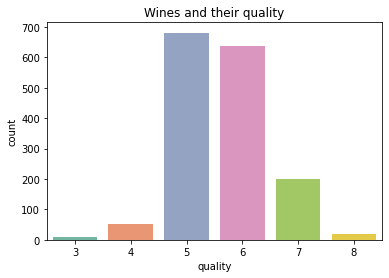

In [13]:
plt.title('Wines and their quality')
sns.countplot(data['quality'])
plt.show()


# **2. Feature engineering**

In [14]:
# data = data.drop(['free sulfur dioxide', 'pH', 'fixed acidity'], axis=1)

# **3. Feature pre-processing**

In [15]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

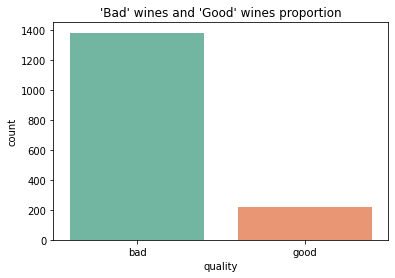

bad     1382
good     217
Name: quality, dtype: int64

In [16]:
plt.title('\'Bad\' wines and \'Good\' wines proportion')
sns.countplot(data['quality'])
plt.show()
data['quality'].value_counts()

In [17]:
label_quality = LabelEncoder()

data['quality'] = label_quality.fit_transform(data['quality'])

x = data.drop('quality', axis = 1)
y = data['quality']



---


Permutation importance 

In [18]:
#Permutation importance 
#Why: https://explained.ai/rf-importance/
#Alternative: rfpimp


PI_data = data.copy()
PI_y = (PI_data['quality'] == "good")
feature_names = [i for i in PI_data.columns if PI_data[i].dtype in [np.int64]]
PI_x = data[feature_names]
PI_train_x, PI_val_x, PI_train_y, PI_val_y = train_test_split(x, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=1000,
                                  random_state=0).fit(PI_train_x, PI_train_y)

In [19]:
perm = PermutationImportance(my_model, random_state=1).fit(PI_val_x,PI_val_y)
eli5.show_weights(perm, feature_names = PI_val_x.columns.tolist())

Weight,Feature
0.0290 ± 0.0108,sulphates
0.0255 ± 0.0150,alcohol
0.0075 ± 0.0089,volatile acidity
0.0050 ± 0.0089,density
0.0045 ± 0.0139,chlorides
0.0020 ± 0.0066,citric acid
0.0005 ± 0.0049,residual sugar
-0.0000 ± 0.0114,total sulfur dioxide
-0.0005 ± 0.0097,pH
-0.0005 ± 0.0097,fixed acidity




---


Train test split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)



---


Data normalization

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [ ]:
trans = MinMaxScaler()
x_train_norm = trans.fit_transform(x_train)
x_train_norm = DataFrame(x_train_norm, columns=x_train.columns)

In [22]:
x_train_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,0.329530,0.281205,0.272471,0.113389,0.127626,0.222031,0.143665,0.492216,0.450118,0.177929,0.310477
std,0.152588,0.122791,0.195448,0.098342,0.082358,0.153933,0.116403,0.136266,0.121272,0.107119,0.161953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.191781,0.100000,0.068493,0.098497,0.089552,0.056537,0.410059,0.370079,0.110429,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.113523,0.194030,0.113074,0.494126,0.448819,0.153374,0.276923
75%,0.407080,0.356164,0.430000,0.116438,0.131886,0.298507,0.201413,0.570852,0.519685,0.220859,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---


Data standardization:

In [23]:
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

num_cols = x_train_stand.columns.values.tolist()

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])

    x_train_stand[i] = scale.transform(x_train_stand[[i]])
   
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [24]:
x_train_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.239561e-16,4.180480e-16,1.266904e-16,1.736080e-17,-1.854133e-16,-9.478996e-17,-8.038049e-17,2.558044e-14,-1.375149e-15,4.398358e-16,5.815867e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.160453e+00,-2.291000e+00,-1.394630e+00,-1.153456e+00,-1.550257e+00,-1.442950e+00,-1.234688e+00,-3.613585e+00,-3.713085e+00,-1.661679e+00,-1.917831e+00
25%,-7.099747e-01,-7.285451e-01,-8.827838e-01,-4.567030e-01,-3.538207e-01,-8.609621e-01,-7.487957e-01,-6.031534e-01,-6.602541e-01,-6.303756e-01,-8.724843e-01
50%,-2.458216e-01,-5.892147e-02,-6.383064e-02,-2.476770e-01,-1.713135e-01,-1.819756e-01,-2.629030e-01,1.402550e-02,-1.071561e-02,-2.293130e-01,-2.072638e-01
75%,5.084274e-01,6.107022e-01,8.063071e-01,3.102432e-02,5.175080e-02,4.970108e-01,4.963043e-01,5.773023e-01,5.738691e-01,4.009282e-01,6.480197e-01
max,4.395710e+00,5.856087e+00,3.723828e+00,9.019142e+00,1.059661e+01,5.055920e+00,7.359539e+00,3.727879e+00,4.536054e+00,7.677349e+00,4.259217e+00




---


SMOTE

In [25]:
sm = SMOTE(random_state=2)
x_train_SM, y_train_SM = sm.fit_resample(x_train, y_train)
x_train_SM = pd.DataFrame(x_train_SM, columns=x_train.columns)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_SM==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SM==0)))

After OverSampling, counts of label '1': 1109
After OverSampling, counts of label '0': 1109


# **4. Building machine learning model**

4.1. Out of the box models performance comparison:

LR: 0.340278 (0.098479)
LDA: 0.446129 (0.145735)
KNN: 0.302628 (0.083967)
SVM: 0.342558 (0.099954)
CART: 0.549353 (0.090222)
NB: 0.515006 (0.061597)
RF: 0.622421 (0.102344)
XGB: 0.517705 (0.096076)
...................................................


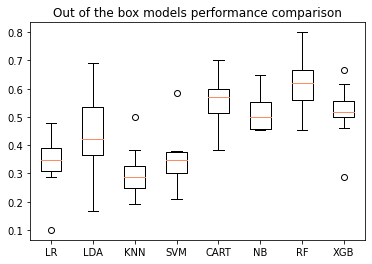

In [26]:
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(gamma='auto')),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('RF', RandomForestClassifier()),
          ('XGB', XGBClassifier())]

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
print("...................................................")
plt.boxplot(results, labels=names)
plt.title('Out of the box models performance comparison')
plt.show()

In [27]:
# print(results)

4.2 Out of the box models performance comparison **with data standartization**:

LR: 0.392074 (0.108304)
LDA: 0.446129 (0.145735)
KNN: 0.473660 (0.091131)
SVM: 0.386748 (0.113406)
CART: 0.565025 (0.090867)
NB: 0.523567 (0.058323)
RF: 0.615669 (0.097349)
XGB: 0.523244 (0.099876)
...................................................


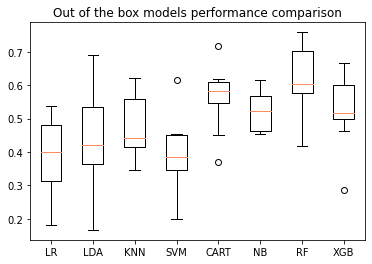

In [28]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train_stand, y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
print("...................................................")
plt.boxplot(results, labels=names)
plt.title('Out of the box models performance comparison')
plt.show()

4.3 Out of the box models performance comparison **with data normalization**:

LR: 0.276363 (0.099218)
LDA: 0.446129 (0.145735)
KNN: 0.483611 (0.064785)
SVM: 0.000000 (0.000000)
CART: 0.551371 (0.090058)
NB: 0.523567 (0.058323)
RF: 0.606299 (0.091647)
XGB: 0.517705 (0.096076)
...................................................


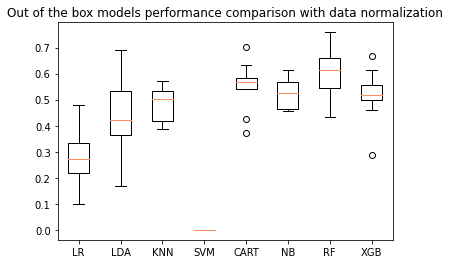

In [29]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train_norm, y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
print("...................................................")
plt.boxplot(results, labels=names)
plt.title('Out of the box models performance comparison with data normalization')
plt.show()

4.4 Out of the box models performance comparison **with SMOTE**:

LR: 0.811736 (0.016749)
LDA: 0.810142 (0.017039)
KNN: 0.889476 (0.021491)
SVM: 0.917363 (0.017958)
CART: 0.893368 (0.021588)
NB: 0.803491 (0.018603)
RF: 0.938041 (0.014078)
XGB: 0.907333 (0.016970)
...................................................


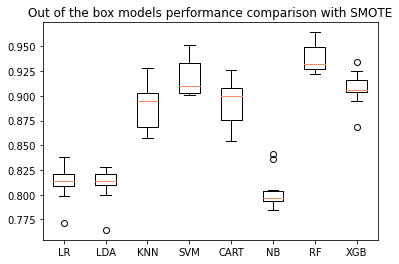

In [30]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train_SM, y_train_SM, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
print("...................................................")
plt.boxplot(results, labels=names)
plt.title('Out of the box models performance comparison with SMOTE')
plt.show()

4.5 Models performance comparison **after hyperparameter tuning**:

LR: 0.340278 (0.098479)
LDA: 0.446129 (0.145735)
KNN: 0.536420 (0.051816)
SVM: 0.342558 (0.099954)
CART: 0.568031 (0.079452)
NB: 0.515006 (0.061597)
RF: 0.620438 (0.115030)
XGB: 0.599934 (0.111658)
...................................................


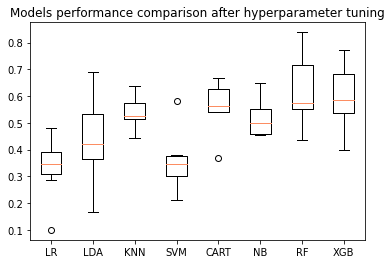

In [31]:
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier(n_neighbors=1)),
          ('SVM', SVC(gamma='auto')),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('RF', RandomForestClassifier(max_features=4,n_estimators=250)),
          ('XGB', XGBClassifier(n_estimators=1000,learning_rate=0.1,max_depth=4,early_stopping_rounds=5,subsample=0.8))]

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
print("...................................................")
plt.boxplot(results, labels=names)
plt.title('Models performance comparison after hyperparameter tuning')
plt.show()

4.6 **Final models** performance comparison using supporting techniques:

LR: 0.798533 (0.015893)
LDA: 0.805648 (0.016345)
KNN: 0.947088 (0.011814)
SVM: 0.801066 (0.016577)
CART: 0.906117 (0.014415)
NB: 0.791139 (0.022872)
RF: 0.951233 (0.018938)
XGB: 0.960526 (0.013251)
...................................................


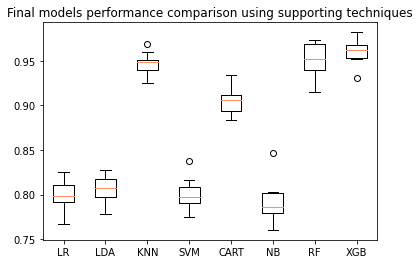

In [32]:
# Using SMOTE on Normalized data, k-fold cross validation, hyperparameter tuning

sm = SMOTE(random_state=2)
x_train_final, y_train_final = sm.fit_resample(x_train_norm, y_train)
x_train_final = pd.DataFrame(x_train_final, columns=x_train.columns)


models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier(n_neighbors=1)),
          ('SVM', SVC(gamma='auto')),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('RF', RandomForestClassifier(max_features=4,n_estimators=250)),
          ('XGB', XGBClassifier(n_estimators=1000,learning_rate=0.1,max_depth=4,early_stopping_rounds=5,subsample=0.8))]

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train_final, y_train_final, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
print("...................................................")
plt.boxplot(results, labels=names)
plt.title('Final models performance comparison using supporting techniques')
plt.show()



---


# **Best performing models**

# XGBOOST

In [37]:
# https://www.kaggle.com/alexisbcook/xgboost

elite_xgb = XGBClassifier(n_estimators=1000, 
                    learning_rate=0.1,
                    max_depth=4, 
                    early_stopping_rounds=5,
                    subsample=0.8,
                    #colsample_bytree = 0.4,
                    #gamma=1
                    )  
elite_xgb.fit(x_train_SM, y_train_SM)
y_pred = elite_xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       273
           1       0.71      0.77      0.73        47

    accuracy                           0.92       320
   macro avg       0.83      0.86      0.84       320
weighted avg       0.92      0.92      0.92       320



# Random forest

In [33]:
elite_rf = RandomForestClassifier(max_features=4,n_estimators=1000,n_jobs=-1)
elite_rf.fit(x_train_SM, y_train_SM)
y_pred=elite_rf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       273
           1       0.62      0.79      0.69        47

    accuracy                           0.90       320
   macro avg       0.79      0.85      0.81       320
weighted avg       0.91      0.90      0.90       320



In [38]:
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.734694


In [34]:
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.692


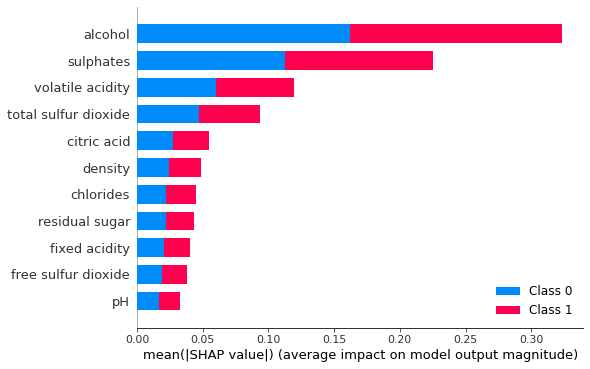

In [35]:
import shap

explainer = shap.TreeExplainer(elite_rf)
shap_values = explainer.shap_values(x)


shap.summary_plot(shap_values, x)

# k-Nearest Neighbors

In [58]:
elite_knn = KNeighborsClassifier(n_neighbors=1)
elite_knn.fit(x_train_final, y_train_final)
y_pred = elite_knn.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       273
           1       0.37      0.68      0.48        47

    accuracy                           0.78       320
   macro avg       0.65      0.74      0.67       320
weighted avg       0.85      0.78      0.81       320



In [59]:
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.477612


# Notes:

https://machinelearningmastery.com/



In [41]:
# ?display
# ??display